In [14]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "mrnanorm.txt"
mapper = {'Akt': "AKT1",
    'ALDH1A1 (PMID 11751205)': "ALDH1A1", 
    'Aqp5(Aquaporin)': "AQP5",
    'C/EBP': "CEBPB",
    'Chi3l3/Chi3l4': "CHI3L1",
    'Claudin 1': "CLDN1",
    'Claudin 3': "CLDN3",
    'Claudin 7': "CLDN7", 
    'Claudin5': "CLDN5",
    #"Serpina3": "a1ACT",
    'E-Cadherin (CDH1)': "CDH1",
    'FSP1 (S100a4)': "AIFM2",
    'GUCY1A2  sGC(soluble guanylate cyclase) (PMID 23934926)': "GUCY1A2",
    'EGFR (Epidermal growth factor receptor) (PMID 22916088 22245996)': "EGFR",
    'ITGax (CD11c)': "ITGAX",
    'integrin subunit alpha 8': "ITGA8",
    'LFNG (Lunatic Fringe) (PMID 19897741)': "LFNG",
    'PDGFRA (platelet-derived growth factor receptor alpha) (PMID 23748534) (Most important)': "PDGFRA",
    'PDPn(Podoplanin)': "PDPn",
    'RARA RARBRARG  Retinoic acid receptors alpha beta gamma': "RARA",
    'Vegf': "VEGFA",
    'ITgam (CD11b)': "ITGAM",
    'kcne1L': "KCNE5",
    'KLra4': "KLRC4",
    'ERB': "ErbB2",
    'hprt': "HPRT1",
    'RAGE': "AGER",  
    'GATA-6': "GATA6",
    'HIF1alpha': "HIF1A",
    'Hist1h2ab': "H2AC4",
    'SFTP-C': "SFTPC",
    'SFTP-D': "SFTPD",
    'TTF-1': "TTF1",
    'MMP-3': "MMP3",
    'MUC5Ab': "MUC5B",
    'N-Cadherin(CDH2)': "CDH2",
    'P-63': "TRP63",
    "Serpina3": "Serpina3n",
    'BCL2A1': "BCL2",
    'KLRC4': " HGNC",
    'Hist1h1b': "H1f5",
}  

indices = {}
count = 0
info = {}
with open(fname,"r") as infile:
    for line in infile:
        splitted = line.rstrip().split("\t")
        if count == 0:
            for ind in range(1,len(splitted)):
                num = float(splitted[ind])
                if num < 0:
                    continue
                if num not in indices:
                    indices[num] = []
                indices[num].append(ind)
            count += 1
            continue
        splitted = line.rstrip().split("\t")
        values = [float(item) for item in splitted[1:]]
        data = {}
        for key,here in indices.items():
            data[key] = np.mean([values[index-1] for index in here])
        gene = splitted[0]
        info[gene] = data

#symbols = ['KLRC4']
symbols = info.keys()
missing = []
for symbol in symbols:
    try:
        if symbol in mapper:
            symbol = mapper[symbol]
        result = ensembl_rest.symbol_lookup(
            species='mus musculus',
            symbol=symbol
        )
        print(f"Symbol: {symbol}, Gene ID: {result['id']}, Chromosome: {result['seq_region_name']}, Start: {result['start']}, End: {result['end']}")
    except ensembl_rest.HTTPError as err:
        error_code = err.response.status_code
        error_message = err.response.json()['error']
        if error_code == 400:
            if 'No valid lookup found for symbol' in error_message:
                print(f"No valid lookup found for symbol: {symbol}")
                missing.append(symbol)
            else:
                print(f"HTTP Error {error_code}: {error_message}")
        else:
            raise

print(missing)
print(len(missing))

Symbol: ABCA3, Gene ID: ENSMUSG00000024130, Chromosome: 17, Start: 24570924, End: 24629175
Symbol: ABCD1, Gene ID: ENSMUSG00000031378, Chromosome: X, Start: 72760203, End: 72782140
Symbol: ABCG2, Gene ID: ENSMUSG00000029802, Chromosome: 6, Start: 58561508, End: 58672661
Symbol: Acta2, Gene ID: ENSMUSG00000035783, Chromosome: 19, Start: 34218490, End: 34232990
Symbol: actb, Gene ID: ENSMUSG00000029580, Chromosome: 5, Start: 142888870, End: 142892509
Symbol: ADAMTSL2, Gene ID: ENSMUSG00000036040, Chromosome: 2, Start: 26969391, End: 26998993
Symbol: AGER, Gene ID: ENSMUSG00000015452, Chromosome: 17, Start: 34816836, End: 34819910
Symbol: AKT1, Gene ID: ENSMUSG00000001729, Chromosome: 12, Start: 112620255, End: 112641318
Symbol: ALDH1A1, Gene ID: ENSMUSG00000053279, Chromosome: 19, Start: 20470079, End: 20620829
Symbol: ALDH1A2, Gene ID: ENSMUSG00000013584, Chromosome: 9, Start: 71123071, End: 71203525
Symbol: AMACR, Gene ID: ENSMUSG00000022244, Chromosome: 15, Start: 10981842, End: 10996

In [2]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "mrnanorm.txt"

mapper = {
    'Akt': "AKT1",
    'ALDH1A1 (PMID 11751205)': "ALDH1A1", 
    'Aqp5(Aquaporin)': "AQP5",
    'C/EBP': "CEBPB",
    'Chi3l3/Chi3l4': "CHI3L1",
    'Claudin 1': "CLDN1",
    'Claudin 3': "CLDN3",
    'Claudin 7': "CLDN7", 
    'Claudin5': "CLDN5",
    'E-Cadherin (CDH1)': "CDH1",
    'FSP1 (S100a4)': "AIFM2",
    'GUCY1A2  sGC(soluble guanylate cyclase) (PMID 23934926)': "GUCY1A2",
    'EGFR (Epidermal growth factor receptor) (PMID 22916088 22245996)': "EGFR",
    'ITGax (CD11c)': "ITGAX",
    'integrin subunit alpha 8': "ITGA8",
    'LFNG (Lunatic Fringe) (PMID 19897741)': "LFNG",
    'PDGFRA (platelet-derived growth factor receptor alpha)': "PDGFRA",
    'PDPn(Podoplanin)': "PDPn",
    'RARA RARBRARG  Retinoic acid receptors alpha beta gamma': "RARA",
    'Vegf': "VEGFA",
    'ITgam (CD11b)': "ITGAM",
    'kcne1L': "KCNE5",
    'KLra4': "KLRC4",
    'ERB': "ErbB2",
    'hprt': "HPRT1",
    'RAGE': "AGER",  
    'GATA-6': "GATA6",
    'HIF1alpha': "HIF1A",
    'Hist1h2ab': "H2AC4",
    'SFTP-C': "SFTPC",
    'SFTP-D': "SFTPD",
    'TTF-1': "TTF1",
    'MMP-3': "MMP3",
    'MUC5Ab': "MUC5B",
    'N-Cadherin(CDH2)': "CDH2",
    'P-63': "TRP63",
    "Serpina3": "Serpina3n",
    'BCL2A1': "BCL2",
    'KLRC4': " HGNC",
    'Hist1h1b': "H1f5",
}

indices = {}
count = 0
info = {}
with open(fname, "r") as infile:
    for line in infile:
        splitted = line.rstrip().split("\t")
        if count == 0:  
            for ind in range(1, len(splitted)):
                num = float(splitted[ind])
                if num not in indices:
                    indices[num] = []
                indices[num].append(ind)
            count += 1
            continue
    
        values = [float(item) for item in splitted[1:]]
        data = {}
        for key, here in indices.items():
            data[key] = np.mean([values[index-1] for index in here])
        gene = splitted[0]
        info[gene] = data

gene_info = []
missing_genes = []
for gene, expression in info.items():
    original_gene = gene
    if gene in mapper:
        gene = mapper[gene]
    try:
        result = ensembl_rest.symbol_lookup(species='mus musculus', symbol=gene)
        chromosome = result['seq_region_name']
        start = result['start']
        end = result['end']
    except ensembl_rest.HTTPError as err:
        chromosome, start, end = 'NA', 'NA', 'NA'
        missing_genes.append(original_gene)
    
    gene_info.append({'Gene': original_gene, 'Chromosome': chromosome, 'Start': start, 'End': end, **expression})

final_df = pd.DataFrame(gene_info)


final_df.to_csv("processed_mRNA_with_chromosomes.csv", index=False)

pd.DataFrame({'Missing Genes': missing_genes}).to_csv("missing_genes.csv", index=False)

print("Processed data saved to 'processed_mRNA_with_chromosomes.csv'.")
print("Missing genes saved to 'missing_genes.csv'.")


Processed data saved to 'processed_mRNA_with_chromosomes.csv'.
Missing genes saved to 'missing_genes.csv'.


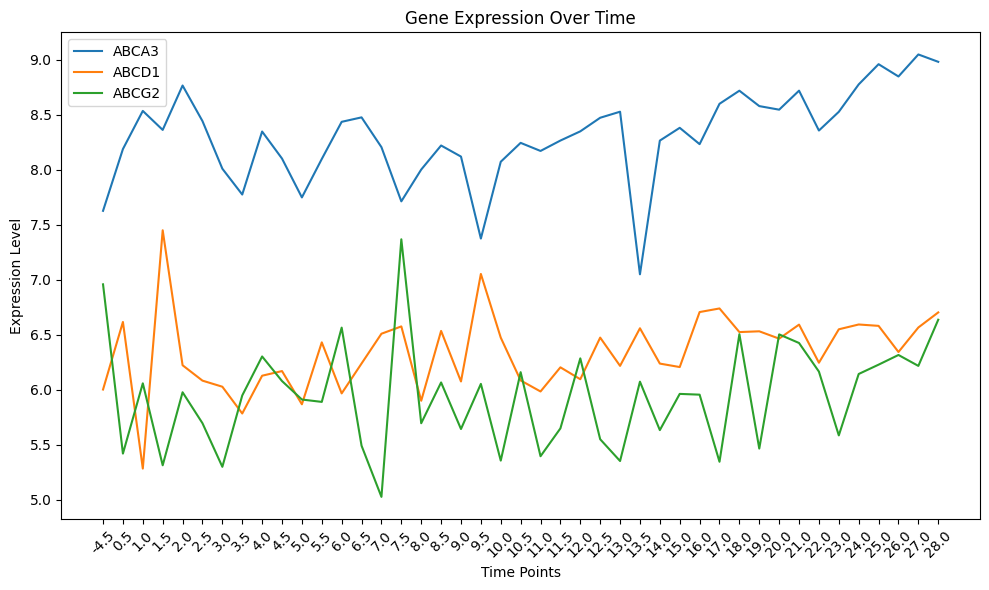

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_mRNA_with_chromosomes.csv")

genes_to_plot = ['ABCA3', 'ABCD1', 'ABCG2'] 

time_points_columns = [col for col in df.columns if col not in ['Gene', 'Chromosome', 'Start', 'End']]

plt.figure(figsize=(10, 6))

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]
    expression_values = gene_data[time_points_columns].values.flatten()
    
    plt.plot(time_points_columns, expression_values, label=gene)

plt.title('Gene Expression Over Time')
plt.xlabel('Time Points')
plt.ylabel('Expression Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

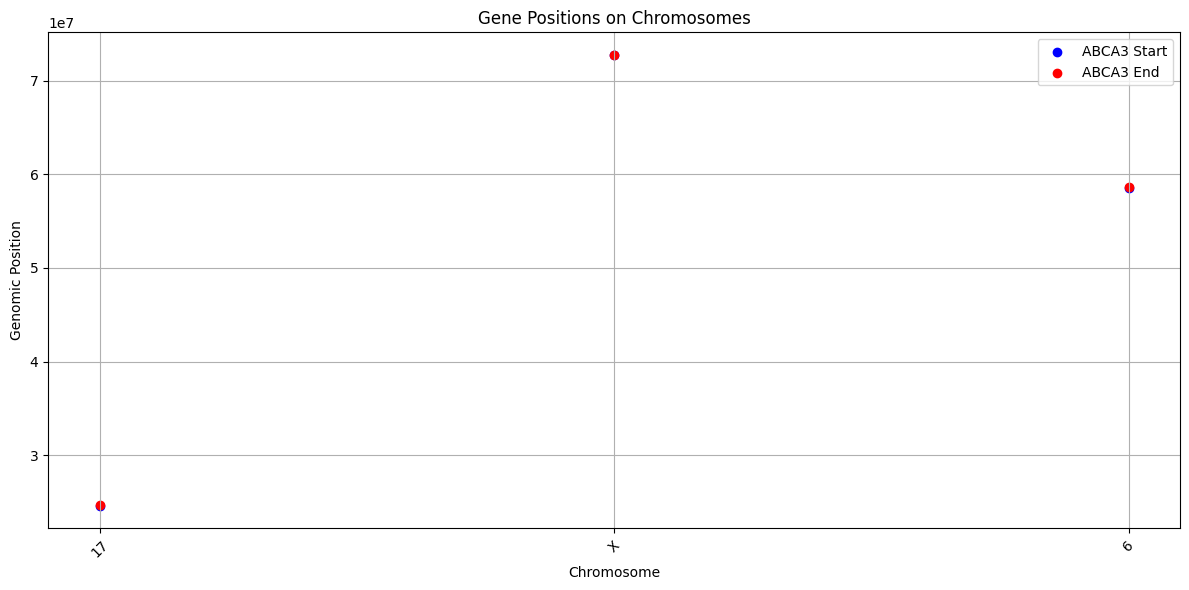

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_mRNA_with_chromosomes.csv")
genes_to_plot = ['ABCA3', 'ABCD1', 'ABCG2', 'Actb']  

plt.figure(figsize=(12, 6))

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]
    df['Chromosome'] = df['Chromosome'].astype(str)

    plt.scatter(gene_data['Chromosome'], gene_data['Start'], color='blue', label=f'{gene} Start' if gene == genes_to_plot[0] else "")
    plt.scatter(gene_data['Chromosome'], gene_data['End'], color='red', label=f'{gene} End' if gene == genes_to_plot[0] else "")

plt.title('Gene Positions on Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Genomic Position')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()



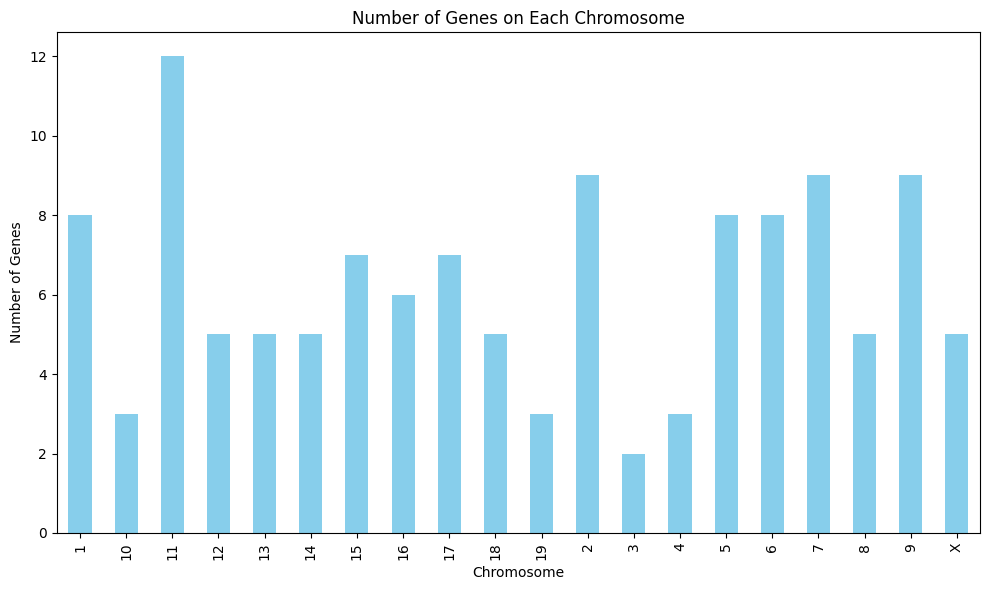

In [7]:
gene_counts = df['Chromosome'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
gene_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Genes on Each Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of Genes')
plt.tight_layout()
plt.show()


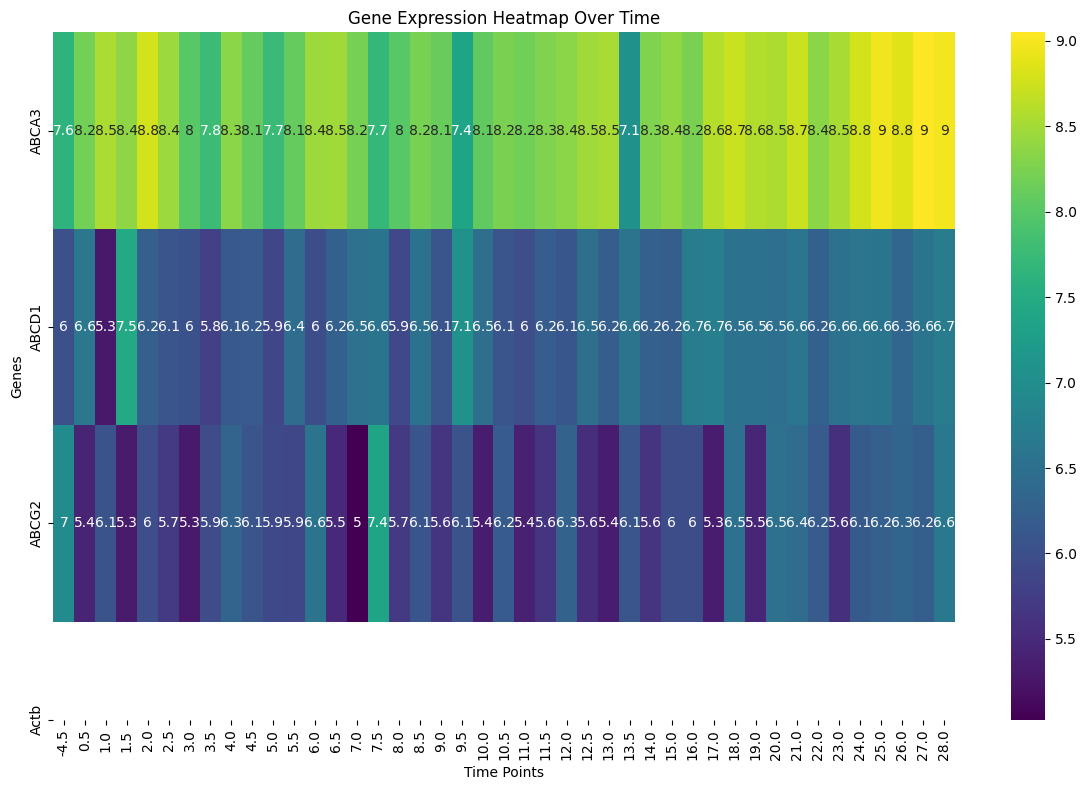

In [14]:
import seaborn as sns

genes_of_interest = ['ABCA3', 'ABCD1', 'ABCG2', 'Actb']  

expression_values = df[df['Gene'].isin(genes_of_interest)][time_points_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(expression_values, annot=True, cmap='viridis', xticklabels=time_points_columns, yticklabels=genes_of_interest)
plt.title("Gene Expression Heatmap Over Time")
plt.xlabel("Time Points")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()


In [16]:
fold_changes = {}

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]

    expression_1 = gene_data['-4.5'].values[0]
    expression_2 = gene_data['1.0'].values[0]

    fold_change = expression_2 / expression_1  
    fold_changes[gene] = fold_change

for gene, fold_change in fold_changes.items():
    print(f"Gene {gene}: Fold Change = {fold_change:.2f}")

"""
Based on output values, Gene ABCA3 is upregulated (increased expression) at the later time point (fold > 1)
ABCD1 and ABCG2 suggests downregulation (decreased expression). (fold < 1)
"""


Gene ABCA3: Fold Change = 1.12
Gene ABCD1: Fold Change = 0.88
Gene ABCG2: Fold Change = 0.87


In [4]:
import pandas as pd 

data = pd.read_csv('mapped/enhanced_interactions_new_new.csv')
data.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [2]:
data.shape

(190, 103)

In [2]:
data.columns

Index(['Gene1', 'Gene1_Chromosome', 'Gene1_Start', 'Gene1_End', 'Gene1_Bin',
       'Gene2', 'Gene2_Chromosome', 'Gene2_Start', 'Gene2_End', 'Gene2_Bin',
       ...
       'Gene1_Time_27.0', 'Gene2_Time_27.0', 'Gene1_Time_28.0',
       'Gene2_Time_28.0', 'Gene1_Compartment', 'Gene2_Compartment',
       'Gene1_Insulation_Score', 'Gene2_Insulation_Score',
       'Gene1_TAD_Boundary_Distance', 'Gene2_TAD_Boundary_Distance'],
      dtype='object', length=103)

In [22]:
import pandas as pd
data_new_mapped = pd.read_csv('mapped/complete_genome_mapping_new.csv')
data_new_mapped.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_24.0,Gene2_Time_24.0,Gene1_Time_25.0,Gene2_Time_25.0,Gene1_Time_26.0,Gene2_Time_26.0,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,8.77675,12.38100,8.9605,12.38100,8.84875,12.38100,9.049,12.38100,8.982,12.38100
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,8.77675,7.00325,8.9605,6.84650,8.84875,6.70850,9.049,6.89825,8.982,6.74025
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,8.77675,4.46950,8.9605,4.15050,8.84875,4.38775,9.049,3.99075,8.982,4.81275
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,8.77675,6.00250,8.9605,6.21775,8.84875,6.46625,9.049,6.23225,8.982,6.08250
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,8.77675,10.05775,8.9605,10.30400,8.84875,10.23475,9.049,10.22725,8.982,10.11025


In [23]:
data_new_mapped.shape

(69, 97)

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("mapped/enhanced_interactions_new_new.csv")

shuffled_df = df.copy()
for chrom in df['Gene1_Chromosome'].unique():
    subset = df[df['Gene1_Chromosome'] == chrom]
    shuffled_df.loc[subset.index, 'Gene2'] = np.random.permutation(subset['Gene2'].values)

shuffled_df.to_csv("mapped/synthetic_data.csv", index=False)

In [8]:
data_synethetic = pd.read_csv("mapped/synthetic_data.csv")

In [9]:
data_synethetic.shape

(69, 103)

In [15]:
def clean_gene_name(gene_name):
    if pd.isna(gene_name):
        return gene_name
    return gene_name.split('(')[0].strip()

In [64]:
def prepare_and_generate_synthetic_data(csv_file, problematic_genes, num_synthetic_per_gene=3, noise_std=0.1):
    df = pd.read_csv(csv_file)
    original_columns = df.columns.tolist()
    
    print(f"Original dataset shape: {df.shape}")
    
    df['Gene1_clean'] = df['Gene1'].apply(clean_gene_name)
    df['Gene2_clean'] = df['Gene2'].apply(clean_gene_name)
    
    synthetic_rows = []
    
    for prob_gene in problematic_genes:
        existing_connections = set(df[df['Gene1_clean'] == prob_gene]['Gene2_clean'].tolist() +
                                 df[df['Gene2_clean'] == prob_gene]['Gene1_clean'].tolist())
        
        gene_stats = df[(df['Gene1_clean'] == prob_gene) | (df['Gene2_clean'] == prob_gene)]
        
        if len(gene_stats) > 0:
            base_stats = gene_stats.iloc[0].to_dict()
        else:
            print(f"Warning: No existing data found for {prob_gene}, using dataset statistics")
            base_stats = df.mean().to_dict()
            base_stats.update(df.mode().iloc[0].to_dict())
        
        all_genes = pd.concat([df['Gene1_clean'], df['Gene2_clean']]).unique()
        potential_partners = [g for g in all_genes if g not in existing_connections and g != prob_gene]
        
        if len(potential_partners) < num_synthetic_per_gene:
            print(f"Warning: Not enough potential partners for {prob_gene}")
            continue
        
        selected_partners = np.random.choice(potential_partners, num_synthetic_per_gene, replace=False)
        
        for partner in selected_partners:
            synthetic_row = base_stats.copy()
            
            synthetic_row['Gene1'] = prob_gene
            synthetic_row['Gene2'] = partner
            
            for col in df.columns:
                if col in ['Gene1', 'Gene2', 'Gene1_Compartment', 'Gene2_Compartment']:
                    continue
                    
                if pd.api.types.is_numeric_dtype(df[col].dtype):
                    base_value = synthetic_row[col]
                    if pd.notnull(base_value):
                        # positive scale for normal distribution
                        if 'Time_' in col:
                            # More conservative noise for expression values
                            scale = abs(base_value * noise_std * 0.5) if base_value != 0 else noise_std * 0.5
                        else:
                            scale = abs(base_value * noise_std) if base_value != 0 else noise_std
                            
                        noise = np.random.normal(0, scale)
                        synthetic_row[col] = max(0, base_value + noise)
            
            synthetic_rows.append(synthetic_row)
    
    synthetic_df = pd.DataFrame(synthetic_rows, columns=original_columns)
    
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)
    
    print("\nSynthetic Data Generation Statistics:")
    for gene in problematic_genes:
        orig_connections = len(df[(df['Gene1'] == gene) | (df['Gene2'] == gene)])
        new_connections = len(combined_df[(combined_df['Gene1'] == gene) | 
                                        (combined_df['Gene2'] == gene)])
        print(f"{gene}: {orig_connections} -> {new_connections} connections")
    
    print(f"\nFinal dataset shape: {combined_df.shape}")
    
    if set(combined_df.columns) != set(original_columns):
        print("Warning: Column mismatch detected!")
        print("New columns:", set(combined_df.columns) - set(original_columns))
        print("Missing columns:", set(original_columns) - set(combined_df.columns))
    
    print("\nValue Range Verification:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols[:5]:  
        orig_range = (df[col].min(), df[col].max())
        new_range = (combined_df[col].min(), combined_df[col].max())
        print(f"{col}: Original range {orig_range} -> New range {new_range}")
    
    return combined_df[original_columns]

In [65]:
import pandas as pd
import numpy as np

problematic_genes = ['THTPA', 'AMACR', 'MMP7', 'ABCG2', 'HPGDS', 'VIM']

enhanced_df = prepare_and_generate_synthetic_data(
    csv_file='mapped/enhanced_interactions_new_new.csv',
    problematic_genes=problematic_genes,
    num_synthetic_per_gene=3,
    noise_std=0.1
)

enhanced_df.to_csv('mapped/enhanced_interactions_synthetic.csv', index=False)

Original dataset shape: (69, 103)

Synthetic Data Generation Statistics:
THTPA: 3 -> 6 connections
AMACR: 1 -> 4 connections
MMP7: 4 -> 7 connections
ABCG2: 2 -> 5 connections
HPGDS: 2 -> 5 connections
VIM: 4 -> 9 connections

Final dataset shape: (87, 105)
New columns: {'Gene2_clean', 'Gene1_clean'}
Missing columns: set()

Value Range Verification:
Gene1_Start: Original range (3532778.0, 72760203.0) -> New range (3449961.7532015857, 72760203.0)
Gene1_End: Original range (3894736.0, 72782140.0) -> New range (3727165.615877241, 72782140.0)
Gene1_Bin: Original range (3000000.0, 72000000.0) -> New range (2529858.6622785637, 72000000.0)
Gene2_Start: Original range (6365443.0, 69254684.0) -> New range (6365443.0, 69254684.0)
Gene2_End: Original range (6369817.0, 69416409.0) -> New range (6369817.0, 69416409.0)


In [53]:
data_synethetic = pd.read_csv('mapped/enhanced_interactions_synthetic.csv')

In [54]:
data_synethetic.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [55]:
data_synethetic.columns

Index(['Gene1', 'Gene1_Chromosome', 'Gene1_Start', 'Gene1_End', 'Gene1_Bin',
       'Gene2', 'Gene2_Chromosome', 'Gene2_Start', 'Gene2_End', 'Gene2_Bin',
       ...
       'Gene1_Time_27.0', 'Gene2_Time_27.0', 'Gene1_Time_28.0',
       'Gene2_Time_28.0', 'Gene1_Compartment', 'Gene2_Compartment',
       'Gene1_Insulation_Score', 'Gene2_Insulation_Score',
       'Gene1_TAD_Boundary_Distance', 'Gene2_TAD_Boundary_Distance'],
      dtype='object', length=103)

In [49]:
data_synethetic.shape

(87, 103)

In [24]:
data_real = pd.read_csv('mapped/enhanced_interactions_new_new.csv')

In [25]:
data_real.shape

(69, 103)

In [66]:
def prepare_simple_synthetic_data(csv_file, problematic_genes, num_synthetic_per_gene=3):
    df = pd.read_csv(csv_file)
    original_columns = df.columns.tolist()
    
    print(f"Original dataset shape: {df.shape}")
    
    df['Gene1_clean'] = df['Gene1'].apply(clean_gene_name)
    df['Gene2_clean'] = df['Gene2'].apply(clean_gene_name)
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    synthetic_rows = []
    
    for prob_gene in problematic_genes:
        print(f"\nProcessing {prob_gene}")

        existing_connections = set(df[df['Gene1_clean'] == prob_gene]['Gene2_clean'].tolist() +
                                 df[df['Gene2_clean'] == prob_gene]['Gene1_clean'].tolist())
        gene_stats = df[(df['Gene1_clean'] == prob_gene) | (df['Gene2_clean'] == prob_gene)]
        
        if len(gene_stats) > 0:
            base_stats = {}
            
            numeric_stats = gene_stats[numeric_columns].median()
            base_stats.update(numeric_stats.to_dict())

            non_numeric_columns = [col for col in df.columns if col not in numeric_columns]
            for col in non_numeric_columns:
                base_stats[col] = gene_stats[col].mode().iloc[0] if not gene_stats[col].empty else df[col].mode().iloc[0]
            
        else:
            print(f"Warning: No existing data found for {prob_gene}, using dataset statistics")
            base_stats = {}
            
            numeric_stats = df[numeric_columns].median()
            base_stats.update(numeric_stats.to_dict())
            
            non_numeric_columns = [col for col in df.columns if col not in numeric_columns]
            for col in non_numeric_columns:
                base_stats[col] = df[col].mode().iloc[0]
        
        all_genes = pd.concat([df['Gene1_clean'], df['Gene2_clean']]).unique()
        potential_partners = [g for g in all_genes if g not in existing_connections and g != prob_gene]
        
        if len(potential_partners) < num_synthetic_per_gene:
            print(f"Warning: Not enough potential partners for {prob_gene}")
            continue
        
        time_cols = [col for col in numeric_columns if 'Time_' in col]
        partner_scores = []
        
        for partner in potential_partners:
            partner_stats = df[(df['Gene1_clean'] == partner) | (df['Gene2_clean'] == partner)]
            if len(partner_stats) > 0:
                similarity = 0
                for col in time_cols:
                    partner_val = partner_stats[col].median()
                    if col in base_stats and not pd.isna(base_stats[col]) and not pd.isna(partner_val):
                        similarity += abs(base_stats[col] - partner_val)
                partner_scores.append((partner, similarity))
        
        if partner_scores:
            partner_scores.sort(key=lambda x: x[1])
            selected_partners = [p[0] for p in partner_scores[:num_synthetic_per_gene]]
        else:
            selected_partners = np.random.choice(potential_partners, num_synthetic_per_gene, replace=False)
        
        for partner in selected_partners:
            synthetic_row = base_stats.copy()
            synthetic_row['Gene1'] = prob_gene
            synthetic_row['Gene2'] = partner
            synthetic_rows.append(synthetic_row)

    synthetic_df = pd.DataFrame(synthetic_rows, columns=original_columns)
    
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)
    
    print("\nSynthetic Data Generation Statistics:")
    for gene in problematic_genes:
        orig_connections = len(df[(df['Gene1'] == gene) | (df['Gene2'] == gene)])
        new_connections = len(combined_df[(combined_df['Gene1'] == gene) | 
                                        (combined_df['Gene2'] == gene)])
        print(f"{gene}: {orig_connections} -> {new_connections} connections")
    
    print(f"\nFinal dataset shape: {combined_df.shape}")
    
    return combined_df[original_columns]

In [72]:
problematic_genes = ['ABCA3','hprt','MCPt4','E2F8','MGAT4A','TGFB1','EGFR','tfrc','THTPA', 'AMACR', 'MMP7', 'ABCG2', 'HPGDS', 'VIM']

enhanced_df = prepare_simple_synthetic_data(
    csv_file='mapped/enhanced_interactions_new_new.csv',
    problematic_genes=problematic_genes,
    num_synthetic_per_gene=3
)
enhanced_df.to_csv('mapped/enhanced_interactions_synthetic_simple.csv', index=False)

Original dataset shape: (69, 103)

Processing ABCA3

Processing hprt

Processing MCPt4

Processing E2F8

Processing MGAT4A

Processing TGFB1

Processing EGFR

Processing tfrc

Processing THTPA

Processing AMACR

Processing MMP7

Processing ABCG2

Processing HPGDS

Processing VIM

Synthetic Data Generation Statistics:
ABCA3: 5 -> 9 connections
hprt: 1 -> 4 connections
MCPt4: 3 -> 9 connections
E2F8: 1 -> 6 connections
MGAT4A: 1 -> 8 connections
TGFB1: 1 -> 5 connections
EGFR: 0 -> 4 connections
tfrc: 3 -> 7 connections
THTPA: 3 -> 7 connections
AMACR: 1 -> 6 connections
MMP7: 4 -> 7 connections
ABCG2: 2 -> 6 connections
HPGDS: 2 -> 6 connections
VIM: 4 -> 7 connections

Final dataset shape: (111, 105)


In [76]:
problematic_genes = ['ABCA3','hprt','MCPt4','E2F8','MGAT4A','TGFB1','EGFR','tfrc','THTPA','HPGDS', 'VIM']

enhanced_df = prepare_simple_synthetic_data(
    csv_file='mapped/enhanced_interactions_new_new.csv',
    problematic_genes=problematic_genes,
    num_synthetic_per_gene=3
)
enhanced_df.to_csv('mapped/enhanced_interactions_synthetic_simple.csv', index=False)

Original dataset shape: (69, 103)

Processing ABCA3

Processing hprt

Processing MCPt4

Processing E2F8

Processing MGAT4A

Processing TGFB1

Processing EGFR

Processing tfrc

Processing THTPA

Processing HPGDS

Processing VIM

Synthetic Data Generation Statistics:
ABCA3: 5 -> 9 connections
hprt: 1 -> 4 connections
MCPt4: 3 -> 9 connections
E2F8: 1 -> 5 connections
MGAT4A: 1 -> 7 connections
TGFB1: 1 -> 4 connections
EGFR: 0 -> 3 connections
tfrc: 3 -> 7 connections
THTPA: 3 -> 7 connections
HPGDS: 2 -> 6 connections
VIM: 4 -> 7 connections

Final dataset shape: (102, 105)


In [94]:
data_simple_synthetic = pd.read_csv('mapped/enhanced_interactions_synthetic_simple.csv')

In [95]:
data_simple_synthetic.shape

(102, 103)

In [96]:
data_simple_synthetic.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [93]:
import pandas as pd
original_df = pd.read_csv('mapped/enhanced_interactions_new_new.csv')  

merged_df = pd.merge(original_df, data_simple_synthetic, on=original_df.columns.tolist(), how='outer', indicator=True)
synthetic_only = merged_df[merged_df['_merge'] == 'right_only']

print("Rows in synthetic data that are not in original data:")
synthetic_only_df = merged_df[merged_df['_merge'] == 'right_only']
print(synthetic_only_df.head())

Rows in synthetic data that are not in original data:
    Gene1 Gene1_Chromosome  Gene1_Start   Gene1_End   Gene1_Bin  \
1   ABCA3               17   24570924.0  24629175.0  24000000.0   
5   ABCA3               17   24570924.0  24629175.0  24000000.0   
7   ABCA3               17   24570924.0  24629175.0  24000000.0   
26   E2F8                7   48516177.0  48531344.0  48000000.0   
27   E2F8                7   48516177.0  48531344.0  48000000.0   

                       Gene2 Gene2_Chromosome  Gene2_Start   Gene2_End  \
1                     GATA-6               17   34816836.0  34819910.0   
5   integrin subunit alpha 8               17   34816836.0  34819910.0   
7                       tfrc               17   34816836.0  34819910.0   
26                     AMACR                7   25386427.0  25404502.0   
27                     MCPt4                7   25386427.0  25404502.0   

     Gene2_Bin  ...  Gene2_Time_27.0  Gene1_Time_28.0  Gene2_Time_28.0  \
1   34000000.0  ...     

In [79]:
data_simple_synthetic.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [82]:
def prepare_synthetic_data_with_amacr_handling(csv_file, problematic_genes, num_synthetic_per_gene=3):
    df = pd.read_csv(csv_file)
    original_columns = df.columns.tolist()
    
    print(f"Original dataset shape: {df.shape}")
    
    df['Gene1_clean'] = df['Gene1'].apply(clean_gene_name)
    df['Gene2_clean'] = df['Gene2'].apply(clean_gene_name)
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    synthetic_rows = []
    amacr_stats = df[(df['Gene1_clean'] == 'AMACR') | (df['Gene2_clean'] == 'AMACR')]
    amacr_hic_mean = amacr_stats['HiC_Interaction'].mean()
    print(f"\nAMACR's mean HiC interaction: {amacr_hic_mean}")

    overall_hic_median = df['HiC_Interaction'].median()
    overall_hic_q75 = df['HiC_Interaction'].quantile(0.75)
    print(f"Overall median HiC interaction: {overall_hic_median}")
    print(f"Overall 75th percentile HiC: {overall_hic_q75}")
    
    for prob_gene in problematic_genes:
        print(f"\nProcessing {prob_gene}")

        existing_connections = set(df[df['Gene1_clean'] == prob_gene]['Gene2_clean'].tolist() +
                                 df[df['Gene2_clean'] == prob_gene]['Gene1_clean'].tolist())
        gene_stats = df[(df['Gene1_clean'] == prob_gene) | (df['Gene2_clean'] == prob_gene)]
        
        if len(gene_stats) > 0:
            base_stats = {}
            
            numeric_stats = gene_stats[numeric_columns].median()
            base_stats.update(numeric_stats.to_dict())

            non_numeric_columns = [col for col in df.columns if col not in numeric_columns]
            for col in non_numeric_columns:
                base_stats[col] = gene_stats[col].mode().iloc[0] if not gene_stats[col].empty else df[col].mode().iloc[0]
            
        else:
            print(f"Warning: No existing data found for {prob_gene}, using dataset statistics")
            base_stats = {}
            
            numeric_stats = df[numeric_columns].median()
            base_stats.update(numeric_stats.to_dict())
            
            non_numeric_columns = [col for col in df.columns if col not in numeric_columns]
            for col in non_numeric_columns:
                base_stats[col] = df[col].mode().iloc[0]
        
        all_genes = pd.concat([df['Gene1_clean'], df['Gene2_clean']]).unique()
        potential_partners = [g for g in all_genes if g not in existing_connections and g != prob_gene]
        
        if len(potential_partners) < num_synthetic_per_gene:
            print(f"Warning: Not enough potential partners for {prob_gene}")
            continue
        
        time_cols = [col for col in numeric_columns if 'Time_' in col]
        partner_scores = []
        
        for partner in potential_partners:
            partner_stats = df[(df['Gene1_clean'] == partner) | (df['Gene2_clean'] == partner)]
            if len(partner_stats) > 0:
                similarity = 0
                for col in time_cols:
                    partner_val = partner_stats[col].median()
                    if col in base_stats and not pd.isna(base_stats[col]) and not pd.isna(partner_val):
                        similarity += abs(base_stats[col] - partner_val)
                partner_scores.append((partner, similarity))
        
        if partner_scores:
            partner_scores.sort(key=lambda x: x[1])
            selected_partners = [p[0] for p in partner_scores[:num_synthetic_per_gene]]
        else:
            selected_partners = np.random.choice(potential_partners, num_synthetic_per_gene, replace=False)
        
        for partner in selected_partners:
            synthetic_row = base_stats.copy()
            synthetic_row['Gene1'] = prob_gene
            synthetic_row['Gene2'] = partner

            if prob_gene == 'AMACR':
                synthetic_row['HiC_Interaction'] = (overall_hic_median + overall_hic_q75) / 2
                print(f"Created AMACR connection with HiC: {synthetic_row['HiC_Interaction']}")
            
            synthetic_rows.append(synthetic_row)

    synthetic_df = pd.DataFrame(synthetic_rows, columns=original_columns)
    
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)
    
    print("\nSynthetic Data Generation Statistics:")
    for gene in problematic_genes:
        orig_connections = len(df[(df['Gene1'] == gene) | (df['Gene2'] == gene)])
        new_connections = len(combined_df[(combined_df['Gene1'] == gene) | 
                                        (combined_df['Gene2'] == gene)])
        print(f"{gene}: {orig_connections} -> {new_connections} connections")
        
        if gene == 'AMACR':
            orig_hic = df[(df['Gene1'] == gene) | (df['Gene2'] == gene)]['HiC_Interaction'].mean()
            new_hic = combined_df[(combined_df['Gene1'] == gene) | 
                                (combined_df['Gene2'] == gene)]['HiC_Interaction'].mean()
            print(f"AMACR HiC mean: {orig_hic:.2f} -> {new_hic:.2f}")
    
    print(f"\nFinal dataset shape: {combined_df.shape}")
    
    return combined_df[original_columns]

In [83]:
enhanced_df = prepare_synthetic_data_with_amacr_handling(
    csv_file='mapped/enhanced_interactions_new_new.csv',
    problematic_genes=['THTPA', 'AMACR', 'MMP7', 'ABCG2', 'HPGDS', 'VIM'],
    num_synthetic_per_gene=3
)

enhanced_df.to_csv('mapped/enhanced_interactions_synthetic_amacr_balanced.csv', index=False)

Original dataset shape: (69, 103)

AMACR's mean HiC interaction: 43.5666
Overall median HiC interaction: 76.1127
Overall 75th percentile HiC: 116.5836

Processing THTPA

Processing AMACR
Created AMACR connection with HiC: 96.34815
Created AMACR connection with HiC: 96.34815
Created AMACR connection with HiC: 96.34815

Processing MMP7

Processing ABCG2

Processing HPGDS

Processing VIM

Synthetic Data Generation Statistics:
THTPA: 3 -> 6 connections
AMACR: 1 -> 4 connections
AMACR HiC mean: 43.57 -> 83.15
MMP7: 4 -> 7 connections
ABCG2: 2 -> 5 connections
HPGDS: 2 -> 6 connections
VIM: 4 -> 7 connections

Final dataset shape: (87, 105)


In [84]:
data_amcr = pd.read_csv('mapped/enhanced_interactions_synthetic_amacr_balanced.csv')

In [85]:
data_amcr.shape

(87, 103)

In [ ]:
data_TGFB1 =[5.526428571428572, 3.292, 3.133, 1.5924999999999998, 2.6100000000000003, 2.787, 3.4128, 3.5885, 4.03075, 3.085, 3.5685, 3.37025, 4.057, 3.18975, 3.1654, 4.553, 3.04375, 2.78325, 3.381, 3.8555, 3.671, 4.492, 3.45125, 2.63575, 3.1355000000000004, 2.68725, 3.2435, 3.277, 2.43525, 2.9930000000000003, 2.85275, 2.373, 2.21675, 2.27525, 2.7420000000000004, 3.0387500000000003, 2.8405, 2.41925, 2.72825, 2.23625, 2.53475, 3.00775, 3.619]
data_E2F8 = [5.526428571428572, 3.292, 3.133, 1.5924999999999998, 2.6100000000000003, 2.787, 3.4128, 3.5885, 4.03075, 3.085, 3.5685, 3.37025, 4.057, 3.18975, 3.1654, 4.553, 3.04375, 2.78325, 3.381, 3.8555, 3.671, 4.492, 3.45125, 2.63575, 3.1355000000000004, 2.68725, 3.2435, 3.277, 2.43525, 2.9930000000000003, 2.85275, 2.373, 2.21675, 2.27525, 2.7420000000000004, 3.0387500000000003, 2.8405, 2.41925, 2.72825, 2.23625, 2.53475, 3.00775, 3.619]

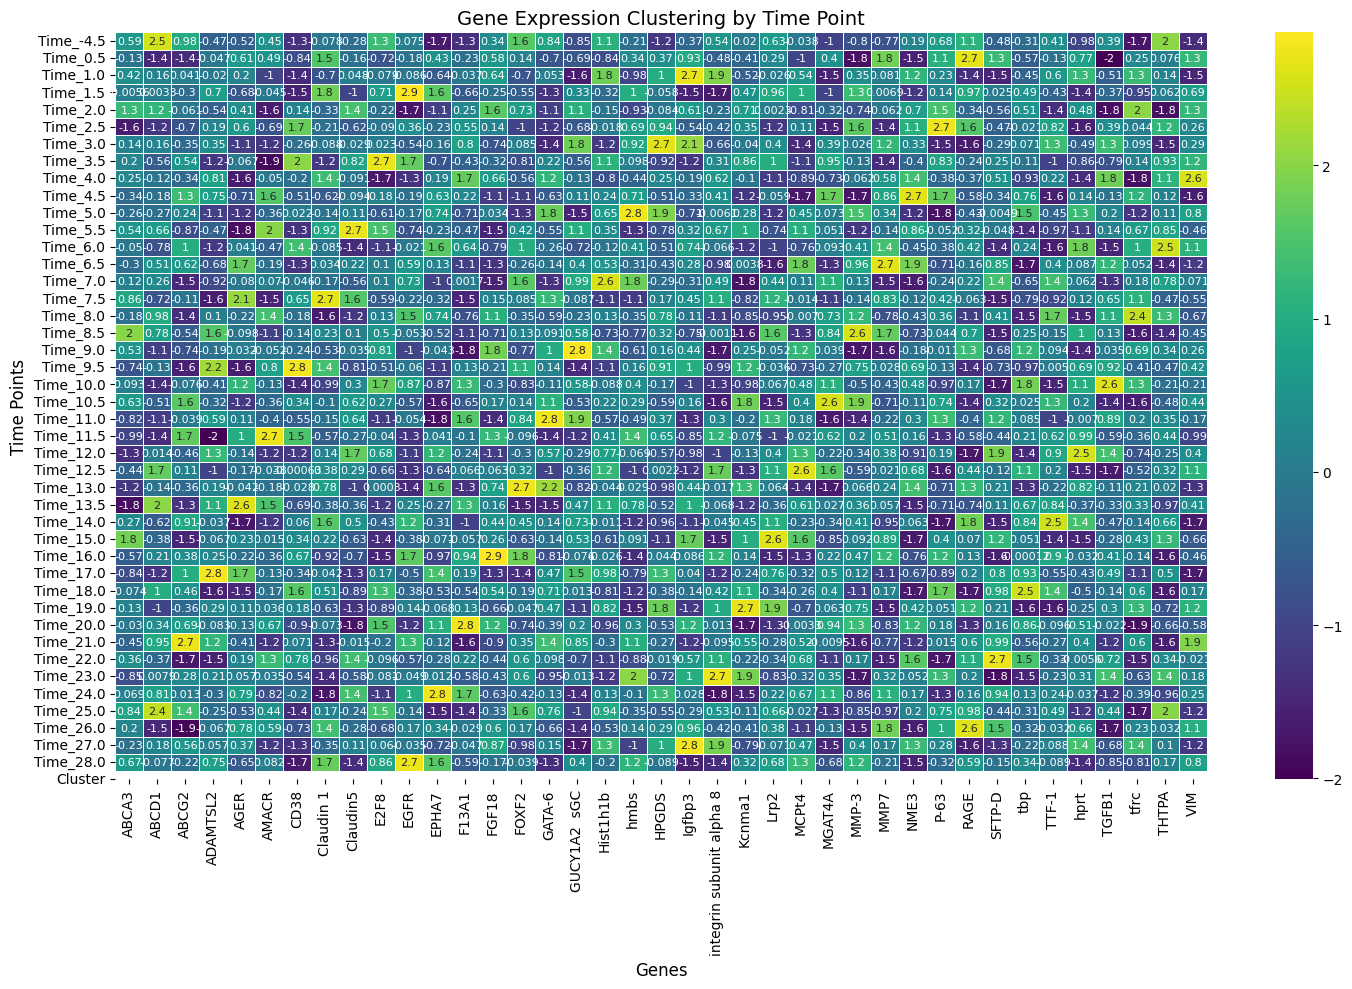

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def clean_gene_name(gene_name):
    if pd.isna(gene_name):
        return gene_name
    return gene_name.split('(')[0].strip()

df = pd.read_csv("/Users/beyzakaya/Desktop/temporal gene/mapped/enhanced_interactions_synthetic_simple.csv")

time_points = [
               '-4.5', '0.5', '1.0', '1.5', '2.0', 
               '2.5', '3.0', '3.5', '4.0', '4.5', 
               '5.0', '5.5', '6.0', '6.5', '7.0', 
               '7.5', '8.0', '8.5', '9.0', '9.5', 
               '10.0', '10.5', '11.0', '11.5','12.0', 
               '12.5', '13.0', '13.5', '14.0', '15.0', 
               '16.0', '17.0', '18.0', '19.0', '20.0', 
               '21.0', '22.0', '23.0', '24.0', '25.0', 
               '26.0', '27.0', '28.0'
               ]

df['Gene1_clean'] = df['Gene1'].apply(clean_gene_name)
df['Gene2_clean'] = df['Gene2'].apply(clean_gene_name)

all_expressions = []
genes = []

for t in time_points:
    for gene in df['Gene1_clean'].unique():
        gene1_expr = df[df['Gene1_clean'] == gene][f'Gene1_Time_{t}'].values
        gene2_expr = df[df['Gene2_clean'] == gene][f'Gene2_Time_{t}'].values
        
        expr_value = gene1_expr[0] if len(gene1_expr) > 0 else \
                     (gene2_expr[0] if len(gene2_expr) > 0 else 0.0)
        
        all_expressions.append(expr_value)
        genes.append(gene)

expression_df = pd.DataFrame(np.array(all_expressions).reshape(len(df['Gene1_clean'].unique()), len(time_points)),
                             columns=[f'Time_{t}' for t in time_points], 
                             index=df['Gene1_clean'].unique())

scaler = StandardScaler()
expression_data_scaled = pd.DataFrame(scaler.fit_transform(expression_df), 
                                      columns=expression_df.columns, 
                                      index=expression_df.index)

num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
expression_data_scaled['Cluster'] = kmeans.fit_predict(expression_data_scaled)

plt.figure(figsize=(15, 10))  
sns.heatmap(expression_data_scaled.drop('Cluster', axis=1).T, 
            cmap='viridis', annot=True, cbar=True,
            annot_kws={"size": 8},  
            xticklabels=expression_data_scaled.index, 
            yticklabels=expression_data_scaled.columns,
            linewidths=0.5)

plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.title("Gene Expression Clustering by Time Point", fontsize=14)
plt.xlabel("Genes", fontsize=12)
plt.ylabel("Time Points", fontsize=12)

plt.tight_layout()
plt.show()

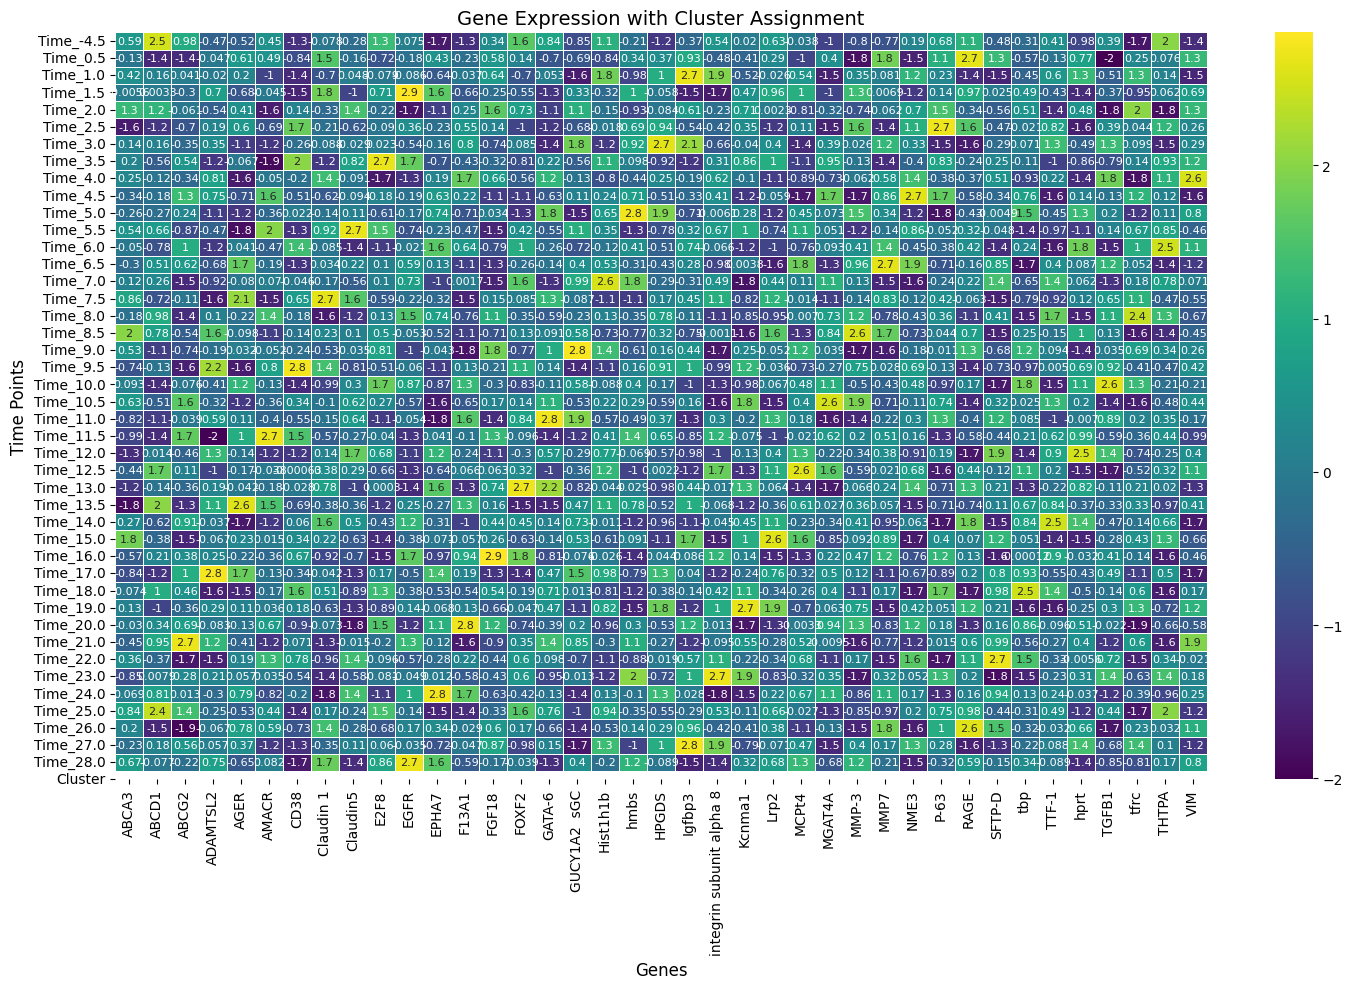

In [8]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(expression_data_scaled.drop('Cluster', axis=1).T, 
            cmap='viridis', annot=True, cbar=True,
            annot_kws={"size": 8}, 
            xticklabels=expression_data_scaled.index, 
            yticklabels=expression_data_scaled.columns,
            linewidths=0.5)

plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.title("Gene Expression with Cluster Assignment", fontsize=14)
plt.xlabel("Genes", fontsize=12)
plt.ylabel("Time Points", fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
print("Cluster Assignment for each gene:")
for idx, cluster in enumerate(expression_data_scaled['Cluster']):
    print(f"{expression_data_scaled.index[idx]} is in cluster {cluster}")

Cluster Assignment for each gene:
ABCA3 is in cluster 0
ABCD1 is in cluster 0
ABCG2 is in cluster 0
ADAMTSL2 is in cluster 2
AGER is in cluster 1
AMACR is in cluster 2
CD38 is in cluster 0
Claudin 1 is in cluster 0
Claudin5 is in cluster 1
E2F8 is in cluster 1
EGFR is in cluster 1
EPHA7 is in cluster 1
F13A1 is in cluster 2
FGF18 is in cluster 0
FOXF2 is in cluster 0
GATA-6 is in cluster 0
GUCY1A2  sGC is in cluster 1
Hist1h1b is in cluster 1
hmbs is in cluster 2
HPGDS is in cluster 1
Igfbp3 is in cluster 0
integrin subunit alpha 8 is in cluster 0
Kcnma1 is in cluster 0
Lrp2 is in cluster 0
MCPt4 is in cluster 1
MGAT4A is in cluster 2
MMP-3 is in cluster 1
MMP7 is in cluster 0
NME3 is in cluster 2
P-63 is in cluster 0
RAGE is in cluster 0
SFTP-D is in cluster 1
tbp is in cluster 1
TTF-1 is in cluster 0
hprt is in cluster 0
TGFB1 is in cluster 2
tfrc is in cluster 0
THTPA is in cluster 2
VIM is in cluster 1


In [19]:
import requests
from bs4 import BeautifulSoup

def get_miRNA_info_from_mirbase(accession_number):
    url = f"http://www.mirbase.org/cgi-bin/mirna_entry.pl?acc={accession_number}"

    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        gene_name_tag = soup.find('b', text="Gene Name:")
        if gene_name_tag:
            gene_name = gene_name_tag.find_next('font').text.strip()
            return gene_name
        else:
            print(f"Gene name not found for {accession_number}.")
            return None
    else:
        print(f"Failed to retrieve data for {accession_number}. Status code: {response.status_code}")
        return None

accession_number = 'MIMAT0001564'
gene_name = get_miRNA_info_from_mirbase(accession_number)

if gene_name:
    print(f"The gene name for {accession_number} is: {gene_name}")


Failed to retrieve data for MIMAT0001564. Status code: 404


In [ ]:
mapped = {
    'actb':'Actb',
    'ath-miR159a': 'MYB',
    'b2m': 'B2m',
    'cel-miR-248': 'Mitf',
    'Gapdh': 'Gapdh',
    'mcmv-miR-m01-1': 'Ptbp1',
    'mcmv-miR-m01-2': 'Map3k3',
    'mcmv-miR-m01-3': 'Vps37c',
    'mcmv-miR-m01-4': 'Rab5c',
    'mcmv-miR-m107-1-3p': 'Tapbp',
    'mcmv-miR-m107-1-5p': 'MCMV',
    'mcmv-miR-m108-1': 'Trim28',
    'mcmv-miR-m108-2-3p': 'Cenpj',
    'mcmv-miR-m108-2-5p.1': 'Il18rap',
    'mcmv-miR-m108-2-5p.2': 'Dek',
    'mcmv-miR-m21-1': 'Ctnnb1',
    'mcmv-miR-m22-1': 'Nell2 ',
    'mcmv-miR-M23-1-3p': 'Irf1 ',
    'mcmv-miR-M23-1-5p': 'Ccl5', 
    'mcmv-miR-M23-2': 'Pik3cd',
    'mcmv-miR-M44-1': 'Erap1',
    'mcmv-miR-M55-1': 'Icos',
    'mcmv-miR-m59-1': 'Ltbr',
    'mcmv-miR-m59-2': 'Cd47',
    '26dakaldım':

}

In [22]:
import requests

def get_gene_from_mirna(mirna_name, species="mus_musculus"):
    base_url = "https://rest.ensembl.org"
    endpoint = f"/xrefs/symbol/{species}/{mirna_name}?content-type=application/json"
    
    response = requests.get(base_url + endpoint)
    
    if response.status_code == 200:
        data = response.json()
        if data:
            return [(entry['id'], entry['display_id'], entry['description']) for entry in data]
        else:
            return f"No gene found for {mirna_name}"
    else:
        return f"Error: {response.status_code}"

mirna = "mmu-miR-200c"
print(get_gene_from_mirna(mirna))


KeyError: 'display_id'

In [23]:
import requests

def get_ncbi_gene_info(mirna_name):
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "gene",
        "term": mirna_name,
        "retmode": "json"
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if "esearchresult" in data and "idlist" in data["esearchresult"]:
            return data["esearchresult"]["idlist"]  
        else:
            return f"No NCBI match found for {mirna_name}"
    else:
        return f"Error: {response.status_code}"

print(get_ncbi_gene_info("mcmv-miR-m01-1"))

[]


In [24]:
import requests

def query_ucsc_mirna(mirna_name, genome="mm39"):
    base_url = "https://api.genome.ucsc.edu/getData/track"
    
    params = {
        "genome": genome,  # Mouse genome version
        "track": "wgRna"   # miRNA track
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        for entry in data["wgRna"]:
            if mirna_name in entry.get("name", ""):
                return entry  
        return f"No miRNA mapping found for {mirna_name}"
    else:
        return f"Error: {response.status_code}"

mirna_name = "mcmv-miR-m01-1"
print(query_ucsc_mirna(mirna_name))


Error: 400


In [26]:
import requests

miRNA = "mcmv-miR-m01-1"

url = f"http://mirtarbase.mbc.nctu.edu.tw/php/search.php?miRNA={miRNA}"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)  


JSONDecodeError: Expecting value: line 1 column 40 (char 39)

In [28]:
import pandas as pd

df = pd.read_csv("Conserved_Family_Info.txt", sep="\t")  

mouse_targets = df[df["Species ID"] == 10090]

mouse_targets.to_csv("Mouse_Targets.csv", index=False)

print(mouse_targets.head())


/var/folders/kv/563b5k8n4xg24_t9kd2d72c40000gn/T/ipykernel_2583/3159838090.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Conserved_Family_Info.txt", sep="\t")


      miR Family Gene ID Gene Symbol Transcript ID  Species ID  UTR start  \
10   miR-376c-3p  CDR1as      CDR1as        CDR1as       10090        892   
11   miR-376c-3p  CDR1as      CDR1as        CDR1as       10090        474   
12   miR-376c-3p  CDR1as      CDR1as        CDR1as       10090        511   
13   miR-376c-3p  CDR1as      CDR1as        CDR1as       10090        581   
18  miR-483-3p.1  CDR1as      CDR1as        CDR1as       10090       2756   

    UTR end  MSA start MSA end Seed match  PCT  
10      898       1439    1445    7mer-m8 -1.0  
11      480        780     786    7mer-m8 -1.0  
12      517        820     827    7mer-m8 -1.0  
13      587        917     923    7mer-m8 -1.0  
18     2762       4371    4377    7mer-1a -1.0  


In [44]:
import pandas as pd

df = pd.read_csv("Nonconserved_Family_Info.txt", sep="\t")  

mouse_targets = df[df["Species ID"] == 10090]

mouse_targets.to_csv("Mouse_Targets_Nonconserved.csv", index=False)

print(mouse_targets.head())

       miR Family Gene ID Gene Symbol Transcript ID  Species ID  UTR start  \
2    miR-743ab-3p  CDR1as      CDR1as        CDR1as       10090       2210   
108    miR-590-3p  CDR1as      CDR1as        CDR1as       10090        595   
111   miR-7229-3p  CDR1as      CDR1as        CDR1as       10090        226   
112   miR-7229-3p  CDR1as      CDR1as        CDR1as       10090       2206   
123      miR-6541  CDR1as      CDR1as        CDR1as       10090       2817   

     UTR end  MSA start  MSA end Seed match  PCT  
2       2216       3639     3645    7mer-m8 -1.0  
108      601        949      955    7mer-1a -1.0  
111      232        320      326    7mer-m8 -1.0  
112     2212       3633     3641    7mer-m8 -1.0  
123     2823       4442     4466    7mer-m8 -1.0  


In [36]:
import pandas as pd

df = pd.read_csv("Mouse_Targets.csv")

df_mir128 = df[df["miR Family"] == "miR-128-3p"]

df_sorted = df_mir128.sort_values(by="PCT", ascending=False)

#df_sorted.to_csv("Top_miR-128-Targets.csv", index=False)

print(df_sorted.head(10))  


        miR Family                Gene ID Gene Symbol         Transcript ID  \
977629  miR-128-3p   ENSMUSG00000069729.8      Arid1b  ENSMUST00000115797.3   
279146  miR-128-3p   ENSMUSG00000030519.9       Apba2  ENSMUST00000032732.9   
92729   miR-128-3p   ENSMUSG00000020642.7     Rnf144a  ENSMUST00000020971.7   
802060  miR-128-3p   ENSMUSG00000074781.4       Ube2n  ENSMUST00000099329.3   
680669  miR-128-3p   ENSMUSG00000041771.8     Slc24a4  ENSMUST00000079020.5   
149317  miR-128-3p   ENSMUSG00000024063.7         Lbh  ENSMUST00000024857.7   
512969  miR-128-3p   ENSMUSG00000058070.9        Eml1  ENSMUST00000054955.8   
152223  miR-128-3p  ENSMUSG00000024219.10       Anks1  ENSMUST00000025058.8   
910250  miR-128-3p   ENSMUSG00000037487.6        Ubr5  ENSMUST00000110336.2   
678582  miR-128-3p  ENSMUSG00000022995.11        Enah  ENSMUST00000078719.7   

        Species ID  UTR start  UTR end  MSA start  MSA end Seed match   PCT  
977629       10090       1435     1442       2440   

In [37]:
import pandas as pd

df = pd.read_csv("Mouse_Targets.csv")

df_mir128 = df[df["miR Family"] == "miR-128-3p"]

df_sorted = df_mir128.sort_values(by="PCT", ascending=False)

gene_counts = df_sorted["Gene Symbol"].value_counts().reset_index()
gene_counts.columns = ["Gene Symbol", "Target Site Count"]

df_sorted = df_sorted.merge(gene_counts, on="Gene Symbol")

df_sorted["Seed Priority"] = df_sorted["Seed match"].apply(lambda x: 3 if x == "8mer" else (2 if "7mer-m8" in x else 1))

df_sorted = df_sorted.sort_values(by=["PCT", "Target Site Count", "Seed Priority"], ascending=[False, False, False])

best_gene = df_sorted.iloc[0]  # The top-ranked gene

print("Best predicted gene for miR-128-3p:", best_gene["Gene Symbol"])

#df_sorted.to_csv("Refined_miR-128-Targets.csv", index=False)


Best predicted gene for miR-128-3p: Slc24a4


In [43]:
import pandas as pd
import re

"""
Conserved targets are those that have been evolutionarily maintained and 
are likely to play fundamental roles in biological processes.
"""
mirna_data = pd.read_csv("mapped/mirnanorm.txt", sep="\t") 

print(mirna_data.head())

mirna_data["miR Family"] = mirna_data.iloc[:, 0].str.replace("mmu-", "", regex=True)

targets = pd.read_csv("Mouse_Targets.csv")

selected_genes = []

def extract_mirna_core(mirna_name):
    # Removing any "-5p", "-3p" or similar suffix to match core miRNA name
    return re.sub(r"-\d+p", "", mirna_name)

for mirna in mirna_data["miR Family"].unique():
    mirna_core = extract_mirna_core(mirna)
    
    df_mir = targets[targets["miR Family"].str.contains(mirna_core, case=False, na=False)]

    if df_mir.empty:
        print(f"No targets found for {mirna}, skipping...")
        continue

    #  Sort by PCT (highest first)
    df_sorted = df_mir.sort_values(by="PCT", ascending=False)

    # Count how many times each gene appears (more binding sites = stronger prediction)
    gene_counts = df_sorted["Gene Symbol"].value_counts().reset_index()
    gene_counts.columns = ["Gene Symbol", "Target Site Count"]

    df_sorted = df_sorted.merge(gene_counts, on="Gene Symbol")

    # Relax Seed Match Priority
    def seed_priority(seed_match):
        if seed_match == "8mer":
            return 3
        elif "7mer-m8" in seed_match:
            return 2
        elif "7mer" in seed_match:
            return 1
        else:
            return 0

    df_sorted["Seed Priority"] = df_sorted["Seed match"].apply(seed_priority)

    # Final Sorting (Highest PCT → Most Target Sites → Best Seed Match)
    df_sorted = df_sorted.sort_values(by=["PCT", "Target Site Count", "Seed Priority"], ascending=[False, False, False])

    best_gene = df_sorted.iloc[0]

    selected_genes.append({
        "miRNA": mirna,
        "Best Target Gene": best_gene["Gene Symbol"],
        "PCT": best_gene["PCT"],
        "Target Site Count": best_gene["Target Site Count"],
        "Seed Match": best_gene["Seed match"]
    })

final_results = pd.DataFrame(selected_genes)

final_results.to_csv("Best_Predicted_Genes.csv", index=False)

print("Processing complete! Results saved in 'Best_Predicted_Genes.csv'.")


     Gene Name   Accession #       Probe Name    Class Name  p0.5  P0.5  \
0         actb   NM_007393.1  NM_007393.1:815  Housekeeping  1852  2264   
1  ath-miR159a  MIMAT0000177    nmiR01610.1:1       SpikeIn     4    14   
2          b2m   NM_009735.3  NM_009735.3:177  Housekeeping   199   205   
3  cel-miR-248  MIMAT0000304    nmiR01612.1:1       SpikeIn     9     4   
4        Gapdh   NM_008084.1  NM_008084.1:755  Housekeeping    29    44   

   p0.5.1    p1    P1  P1.1  ...  P28.1  P28.2  P28.3  Unnamed: 157  E16.5  \
0    2485  2270  3816   224  ...    102    503    160           NaN   6087   
1      14     6    17     9  ...     11      7     14           NaN     15   
2     136   241   145    23  ...     69    230     68           NaN    249   
3       4     9    15    13  ...      6     12      7           NaN     16   
4      13    63    14     3  ...      7     23     11           NaN    153   

   E16.5.1  E16.5.2  E16.5.3  E16.5.4  E16.5.5  
0     7734    11970     8674   

In [45]:
import pandas as pd
import re

"""
Nonconserved targets may be more specific to certain species or lineages 
and might be involved in more specialized, adaptive processes.
"""

mirna_data = pd.read_csv("mapped/mirnanorm.txt", sep="\t") 

print(mirna_data.head())

mirna_data["miR Family"] = mirna_data.iloc[:, 0].str.replace("mmu-", "", regex=True)

targets = pd.read_csv("Mouse_Targets_Nonconserved.csv")

selected_genes = []

def extract_mirna_core(mirna_name):
    # Removing any "-5p", "-3p" or similar suffix to match core miRNA name
    return re.sub(r"-\d+p", "", mirna_name)

for mirna in mirna_data["miR Family"].unique():
    mirna_core = extract_mirna_core(mirna)
    
    df_mir = targets[targets["miR Family"].str.contains(mirna_core, case=False, na=False)]

    if df_mir.empty:
        print(f"No targets found for {mirna}, skipping...")
        continue

    #  Sort by PCT (highest first)
    df_sorted = df_mir.sort_values(by="PCT", ascending=False)

    # Count how many times each gene appears (more binding sites = stronger prediction)
    gene_counts = df_sorted["Gene Symbol"].value_counts().reset_index()
    gene_counts.columns = ["Gene Symbol", "Target Site Count"]

    df_sorted = df_sorted.merge(gene_counts, on="Gene Symbol")

    # Relax Seed Match Priority
    def seed_priority(seed_match):
        if seed_match == "8mer":
            return 3
        elif "7mer-m8" in seed_match:
            return 2
        elif "7mer" in seed_match:
            return 1
        else:
            return 0

    df_sorted["Seed Priority"] = df_sorted["Seed match"].apply(seed_priority)

    # Final Sorting (Highest PCT → Most Target Sites → Best Seed Match)
    df_sorted = df_sorted.sort_values(by=["PCT", "Target Site Count", "Seed Priority"], ascending=[False, False, False])

    best_gene = df_sorted.iloc[0]

    selected_genes.append({
        "miRNA": mirna,
        "Best Target Gene": best_gene["Gene Symbol"],
        "PCT": best_gene["PCT"],
        "Target Site Count": best_gene["Target Site Count"],
        "Seed Match": best_gene["Seed match"]
    })

final_results = pd.DataFrame(selected_genes)

final_results.to_csv("Best_Predicted_Genes_Nonconserved.csv", index=False)

print("Processing complete! Results saved in 'Best_Predicted_Genes.csv'.")


     Gene Name   Accession #       Probe Name    Class Name  p0.5  P0.5  \
0         actb   NM_007393.1  NM_007393.1:815  Housekeeping  1852  2264   
1  ath-miR159a  MIMAT0000177    nmiR01610.1:1       SpikeIn     4    14   
2          b2m   NM_009735.3  NM_009735.3:177  Housekeeping   199   205   
3  cel-miR-248  MIMAT0000304    nmiR01612.1:1       SpikeIn     9     4   
4        Gapdh   NM_008084.1  NM_008084.1:755  Housekeeping    29    44   

   p0.5.1    p1    P1  P1.1  ...  P28.1  P28.2  P28.3  Unnamed: 157  E16.5  \
0    2485  2270  3816   224  ...    102    503    160           NaN   6087   
1      14     6    17     9  ...     11      7     14           NaN     15   
2     136   241   145    23  ...     69    230     68           NaN    249   
3       4     9    15    13  ...      6     12      7           NaN     16   
4      13    63    14     3  ...      7     23     11           NaN    153   

   E16.5.1  E16.5.2  E16.5.3  E16.5.4  E16.5.5  
0     7734    11970     8674   

In [46]:
import pandas as pd

nonconserved_df = pd.read_csv('Best_Predicted_Genes_Nonconserved.csv')
conserved_df = pd.read_csv('Best_Predicted_Genes.csv')

nonconserved_df.columns = ['miRNA', 'Best Target Gene', 'PCT', 'Target Site Count', 'Seed Match']
conserved_df.columns = ['miRNA', 'Best Target Gene', 'PCT', 'Target Site Count', 'Seed Match']

combined_df = pd.concat([nonconserved_df, conserved_df], ignore_index=True)

combined_df['PCT'] = pd.to_numeric(combined_df['PCT'], errors='coerce')

best_predicted_genes_df = combined_df.loc[combined_df.groupby('miRNA')['PCT'].idxmax()]

best_predicted_genes_df.to_csv('Final_Best_Predicted_Genes.csv', index=False)

print("Final CSV with best predicted genes has been saved as 'Final_Best_Predicted_Genes.csv'.")


Final CSV with best predicted genes has been saved as 'Final_Best_Predicted_Genes.csv'.


In [89]:
import pandas as pd

mirna_data = pd.read_csv('mapped/mirnanorm.txt', sep="\t")  
predicted_genes_data = pd.read_csv('target_gene_pred/Final_Best_Predicted_Genes.csv')

mirna_data['Gene Name'] = mirna_data['Gene Name'].str.replace('^mmu-', '', regex=True)
mirna_families = mirna_data['Gene Name'].unique()
#print(predicted_genes_data.columns)
predicted_genes = predicted_genes_data['miRNA'].unique() 

no_target_mirnas = [mirna for mirna in mirna_families if mirna not in predicted_genes]

pd.DataFrame(no_target_mirnas, columns=["miRNA Families with No Target Genes"]).to_csv('target_gene_pred/no_target_mirnas.csv', index=False)

print("miRNA Families with No Target Genes:")
print(no_target_mirnas)

miRNA Families with No Target Genes:
['cel-miR-248', 'NEG_A', 'NEG_B', 'NEG_C', 'NEG_D', 'NEG_E', 'NEG_F', 'NEG_G', 'NEG_H', 'osa-miR414', 'POS_A', 'POS_B', 'POS_C', 'POS_D', 'POS_E', 'POS_F']


In [100]:
import pandas as pd

def clean_mirna_name(name):
    prefixes = ['mmu-', 'hsa-', 'cel-']
    cleaned_name = name
    for prefix in prefixes:
        if cleaned_name.startswith(prefix):
            cleaned_name = cleaned_name[len(prefix):]
    return cleaned_name

def match_and_replace_mirnas(original_file, target_file, output_file):
    original_data = pd.read_csv(original_file, sep='\t')
    target_data = pd.read_csv(target_file)
    
    new_data = original_data.copy()
    
    mirna_to_target = dict(zip(target_data['miRNA'], target_data['Best Target Gene']))
    
    matched = []
    not_matched = []
    
    for idx, row in new_data.iterrows():
        original_name = row['Gene Name']
        cleaned_name = clean_mirna_name(original_name)
        

        if cleaned_name in mirna_to_target:
            new_data.at[idx, 'Gene Name'] = mirna_to_target[cleaned_name]
            matched.append(f"{original_name} -> {mirna_to_target[cleaned_name]}")
        else:
            not_matched.append(original_name)
    
    print(f"\nMatched miRNAs: {len(matched)}")
    print("First few matches:")
    for m in matched[:5]:
        print(f"  {m}")
        
    print(f"\nUnmatched miRNAs: {len(not_matched)}")
    print("First few unmatched:")
    for m in not_matched[:5]:
        print(f"  {m}")

    new_data.to_csv(output_file, index=False)
    print(f"\nSaved processed data to: {output_file}")
    
    return new_data

In [101]:
original_file = "mapped/mirnanorm.txt"  
target_file = "target_gene_pred/Final_Best_Predicted_Genes.csv"  
output_file = "target_gene_pred/updated_mirnanorm.csv"

result = match_and_replace_mirnas(original_file, target_file, output_file)

print("\nFirst few rows of processed data:")
print(result[['Gene Name', 'Accession #', 'Class Name']].head())



Matched miRNAs: 604
First few matches:
  actb -> Actb
  ath-miR159a -> MYB
  b2m -> B2m
  Gapdh -> Gapdh
  mcmv-miR-m01-1 -> Abcg1

Unmatched miRNAs: 16
First few unmatched:
  cel-miR-248
  NEG_A
  NEG_B
  NEG_C
  NEG_D

Saved processed data to: target_gene_pred/updated_mirnanorm.csv

First few rows of processed data:
     Gene Name   Accession #    Class Name
0         Actb   NM_007393.1  Housekeeping
1          MYB  MIMAT0000177       SpikeIn
2          B2m   NM_009735.3  Housekeeping
3  cel-miR-248  MIMAT0000304       SpikeIn
4        Gapdh   NM_008084.1  Housekeeping


In [102]:
df = pd.read_csv("target_gene_pred/updated_mirnanorm.csv").drop(['Accession #', 'Probe Name'], axis=1)
df.to_csv("target_gene_pred/updated_mirnanorm.csv", index=False)

In [ ]:
#mcmv-miR-m01-1,Abcg1,NaN,NaN,NaN #burdan itibaren VirBase

In [103]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "target_gene_pred/updated_mirnanorm.csv"

df = pd.read_csv(fname)
symbols = df['Gene Name'].unique().tolist()

missing = []
for symbol in symbols:
    try:
        result = ensembl_rest.symbol_lookup(
            species='mus musculus',
            symbol=symbol
        )
        print(f"Symbol: {symbol}, Gene ID: {result['id']}, Chromosome: {result['seq_region_name']}, Start: {result['start']}, End: {result['end']}")
    except ensembl_rest.HTTPError as err:
        error_code = err.response.status_code
        error_message = err.response.json()['error']
        if error_code == 400:
            if 'No valid lookup found for symbol' in error_message:
                print(f"No valid lookup found for symbol: {symbol}")
                missing.append(symbol)
            else:
                print(f"HTTP Error {error_code}: {error_message}")
        else:
            raise

print("\nMissing symbols:")
print(missing)
print(f"Total missing: {len(missing)}")

Symbol: Actb, Gene ID: ENSMUSG00000029580, Chromosome: 5, Start: 142888870, End: 142892509
Symbol: MYB, Gene ID: ENSMUSG00000019982, Chromosome: 10, Start: 21000834, End: 21036883
Symbol: B2m, Gene ID: ENSMUSG00000060802, Chromosome: 2, Start: 121978167, End: 121983564
No valid lookup found for symbol: cel-miR-248
Symbol: Gapdh, Gene ID: ENSMUSG00000057666, Chromosome: 6, Start: 125138678, End: 125143430
Symbol: Abcg1, Gene ID: ENSMUSG00000024030, Chromosome: 17, Start: 31276649, End: 31336962
Symbol: Acp1, Gene ID: ENSMUSG00000044573, Chromosome: 12, Start: 30943325, End: 30961588
Symbol: Adora1, Gene ID: ENSMUSG00000042429, Chromosome: 1, Start: 134126963, End: 134163169
Symbol: Rab11a, Gene ID: ENSMUSG00000004771, Chromosome: 9, Start: 64622581, End: 64645040
Symbol: Haus2, Gene ID: ENSMUSG00000027285, Chromosome: 2, Start: 120439864, End: 120452041
Symbol: Zfp831, Gene ID: ENSMUSG00000050600, Chromosome: 2, Start: 174485327, End: 174552625
Symbol: Ccl21d, Gene ID: ENSMUSG0000009406

In [122]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "target_gene_pred/updated_mirnanorm.csv"

mapper = {
    'Palm2': "Pakap",
    'Zfp781': "Zfp781b",
    'D1Ertd622e': "Macir",
    'Ccdc114': "Odad1",
    'Fam92a': "CIBAR1",
    'CDR1as': "CDR1",
    'Gm3448': "DYNLT2A2",
    'Hist1h4m': "H4c2",
    'Ptrf': "Cavin1",
    'Gramd2': "Gramd2a",
    'Deb1': "Styxl1",
    'Igj': "Jchain",
    'Zak': "Map3k20",
    'Uhrf1bp1': "BLTP3A",
    'Zfp607': "Zfp607a",
    'Fam84a': "LRATD1",
    'Rnf165': "ARK2C",
    '6330403A02Rik': "STUM",
    'D130040H23Rik': "Zfp781a",
    "Gm14440": 'Zfp1009'
}  

skip_symbols = ['NEG_A', 'NEG_B', 'NEG_C', 'NEG_D', 'NEG_E', 'NEG_F', 'NEG_G', 'NEG_H', 
                'osa-miR414', 'POS_A', 'POS_B', 'POS_C', 'POS_D', 'POS_E', 'POS_F', 
                'cel-miR-248']

df = pd.read_csv(fname)
symbols = df['Gene Name'].unique().tolist()

missing = []
for symbol in symbols:
    if symbol in skip_symbols:
        print(f"Skipping control symbol: {symbol}")
        continue
        
    try:
        if symbol in mapper:
            symbol = mapper[symbol]
        result = ensembl_rest.symbol_lookup(
            species='mus musculus',
            symbol=symbol
        )
        print(f"Symbol: {symbol}, Gene ID: {result['id']}, Chromosome: {result['seq_region_name']}, Start: {result['start']}, End: {result['end']}")
    except ensembl_rest.HTTPError as err:
        error_code = err.response.status_code
        error_message = err.response.json()['error']
        if error_code == 400:
            if 'No valid lookup found for symbol' in error_message:
                print(f"No valid lookup found for symbol: {symbol}")
                missing.append(symbol)
            else:
                print(f"HTTP Error {error_code}: {error_message}")
        else:
            raise

print("\nMissing symbols:")
print(missing)
print(f"Total missing: {len(missing)}")

Symbol: Actb, Gene ID: ENSMUSG00000029580, Chromosome: 5, Start: 142888870, End: 142892509
Symbol: MYB, Gene ID: ENSMUSG00000019982, Chromosome: 10, Start: 21000834, End: 21036883
Symbol: B2m, Gene ID: ENSMUSG00000060802, Chromosome: 2, Start: 121978167, End: 121983564
Skipping control symbol: cel-miR-248
Symbol: Gapdh, Gene ID: ENSMUSG00000057666, Chromosome: 6, Start: 125138678, End: 125143430
Symbol: Abcg1, Gene ID: ENSMUSG00000024030, Chromosome: 17, Start: 31276649, End: 31336962
Symbol: Acp1, Gene ID: ENSMUSG00000044573, Chromosome: 12, Start: 30943325, End: 30961588
Symbol: Adora1, Gene ID: ENSMUSG00000042429, Chromosome: 1, Start: 134126963, End: 134163169
Symbol: Rab11a, Gene ID: ENSMUSG00000004771, Chromosome: 9, Start: 64622581, End: 64645040
Symbol: Haus2, Gene ID: ENSMUSG00000027285, Chromosome: 2, Start: 120439864, End: 120452041
Symbol: Zfp831, Gene ID: ENSMUSG00000050600, Chromosome: 2, Start: 174485327, End: 174552625
Symbol: Ccl21d, Gene ID: ENSMUSG00000094065, Chromo

In [115]:
!curl -X GET "https://rest.ensembl.org/xrefs/id/ENSG00000197782?content-type=application/json"

[{"description":null,"display_id":"ENSG00000197782","version":"0","info_text":"","primary_id":"ENSG00000197782","info_type":"DIRECT","db_display_name":"Expression Atlas","dbname":"ArrayExpress","synonyms":[]},{"description":"zinc finger protein 780A","display_id":"ZNF780A","version":"0","info_text":"","primary_id":"284323","db_display_name":"NCBI gene (formerly Entrezgene)","info_type":"DEPENDENT","dbname":"EntrezGene","synonyms":[]},{"info_text":"","primary_id":"27603","description":"zinc finger protein 780A","version":"0","display_id":"ZNF780A","dbname":"GeneCards","synonyms":[],"db_display_name":"GeneCards","info_type":"DEPENDENT"},{"db_display_name":"HGNC Symbol","info_type":"DIRECT","synonyms":["ZNF780"],"dbname":"HGNC","version":"0","display_id":"ZNF780A","description":"zinc finger protein 780A","primary_id":"HGNC:27603","info_text":"Generated via ensembl_manual"},{"dbname":"Uniprot_gn","synonyms":[],"info_type":"DEPENDENT","db_display_name":"UniProtKB Gene Name","info_text":"","

In [116]:
!curl -X GET "https://rest.ensembl.org/xrefs/id/ENSMUSG00000079038?content-type=application/json"

[{"dbname":"ArrayExpress","primary_id":"ENSMUSG00000079038","display_id":"ENSMUSG00000079038","info_text":"","version":"0","db_display_name":"Expression Atlas","synonyms":[],"info_type":"DIRECT","description":null},{"info_text":"","display_id":"Zfp781a","primary_id":"211135","dbname":"EntrezGene","description":"zinc finger protein 781A","db_display_name":"NCBI gene (formerly Entrezgene)","synonyms":[],"info_type":"DEPENDENT","version":"0"},{"dbname":"MGI","primary_id":"MGI:2444324","info_text":"Generated via official","display_id":"Zfp781a","synonyms":["D130040H23Rik"],"db_display_name":"MGI Symbol","info_type":"DIRECT","version":"0","description":"zinc finger protein 781A"},{"description":null,"db_display_name":"UniProtKB Gene Name","synonyms":[],"info_type":"DEPENDENT","version":"0","info_text":"","display_id":"D130040H23Rik","primary_id":"Q8BII3","dbname":"Uniprot_gn"},{"version":"0","info_type":"DEPENDENT","db_display_name":"UniProtKB Gene Name","synonyms":[],"description":null,"di

In [123]:
import pandas as pd

file_path = "target_gene_pred/updated_mirnanorm.csv" 
df = pd.read_csv(file_path)

mapper = {
    'Palm2': "Pakap",
    'Zfp781': "Zfp781b",
    'D1Ertd622e': "Macir",
    'Ccdc114': "Odad1",
    'Fam92a': "CIBAR1",
    'CDR1as': "CDR1",
    'Gm3448': "DYNLT2A2",
    'Hist1h4m': "H4c2",
    'Ptrf': "Cavin1",
    'Gramd2': "Gramd2a",
    'Deb1': "Styxl1",
    'Igj': "Jchain",
    'Zak': "Map3k20",
    'Uhrf1bp1': "BLTP3A",
    'Zfp607': "Zfp607a",
    'Fam84a': "LRATD1",
    'Rnf165': "ARK2C",
    '6330403A02Rik': "STUM",
    'D130040H23Rik': "Zfp781a",
    "Gm14440": 'Zfp1009'
}

df["Gene Name"] = df["Gene Name"].replace(mapper)

output_file = "target_gene_pred/final_mirnanorm.csv" 
df.to_csv(output_file, index=False)

print("Gene names updated and saved to", output_file)


Gene names updated and saved to target_gene_pred/final_mirnanorm.csv


In [125]:

file_path = "target_gene_pred/final_mirnanorm.csv"  
df = pd.read_csv(file_path)

genes_to_drop = [
    'cel-miR-248', 'NEG_A', 'NEG_B', 'NEG_C', 'NEG_D', 'NEG_E', 
    'NEG_F', 'NEG_G', 'NEG_H', 'osa-miR414', 'POS_A', 'POS_B', 
    'POS_C', 'POS_D', 'POS_E', 'POS_F'
]

df = df[~df["Gene Name"].isin(genes_to_drop)]

df.to_csv(file_path, index=False)

print("Control variables dropped.")

Control variables dropped.


In [126]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "target_gene_pred/final_mirnanorm.csv"

df = pd.read_csv(fname)
symbols = df['Gene Name'].unique().tolist()

missing = []
for symbol in symbols:
    try:
        result = ensembl_rest.symbol_lookup(
            species='mus musculus',
            symbol=symbol
        )
        print(f"Symbol: {symbol}, Gene ID: {result['id']}, Chromosome: {result['seq_region_name']}, Start: {result['start']}, End: {result['end']}")
    except ensembl_rest.HTTPError as err:
        error_code = err.response.status_code
        error_message = err.response.json()['error']
        if error_code == 400:
            if 'No valid lookup found for symbol' in error_message:
                print(f"No valid lookup found for symbol: {symbol}")
                missing.append(symbol)
            else:
                print(f"HTTP Error {error_code}: {error_message}")
        else:
            raise

print("\nMissing symbols:")
print(missing)
print(f"Total missing: {len(missing)}")

Symbol: Actb, Gene ID: ENSMUSG00000029580, Chromosome: 5, Start: 142888870, End: 142892509
Symbol: MYB, Gene ID: ENSMUSG00000019982, Chromosome: 10, Start: 21000834, End: 21036883
Symbol: B2m, Gene ID: ENSMUSG00000060802, Chromosome: 2, Start: 121978167, End: 121983564
Symbol: Gapdh, Gene ID: ENSMUSG00000057666, Chromosome: 6, Start: 125138678, End: 125143430
Symbol: Abcg1, Gene ID: ENSMUSG00000024030, Chromosome: 17, Start: 31276649, End: 31336962
Symbol: Acp1, Gene ID: ENSMUSG00000044573, Chromosome: 12, Start: 30943325, End: 30961588
Symbol: Adora1, Gene ID: ENSMUSG00000042429, Chromosome: 1, Start: 134126963, End: 134163169
Symbol: Rab11a, Gene ID: ENSMUSG00000004771, Chromosome: 9, Start: 64622581, End: 64645040
Symbol: Haus2, Gene ID: ENSMUSG00000027285, Chromosome: 2, Start: 120439864, End: 120452041
Symbol: Zfp831, Gene ID: ENSMUSG00000050600, Chromosome: 2, Start: 174485327, End: 174552625
Symbol: Ccl21d, Gene ID: ENSMUSG00000094065, Chromosome: 4, Start: 41903610, End: 419047